## Data Cleaning & Transforming

Data Cleaning is an essential step towards making real meaning of any dataset. To make the Company data ready for futher analysis and modelling, data cleaning would be performed.

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv data into a datframe
data = pd.read_csv('../data/Week1_challenge_data_source.csv')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


For better understanding of the columns, exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit?ts=60ec0f05#gid=784155610) will help

### Data Understanding/ Exploration

Before proceeding to cleaning the dataset, let us explore what has been stored in it. How many data points present, the column names, datatypes of each colum, descriptive statistics of variables, presence of missing values etc. All these questions needs to be answered.

In [3]:
import sys
sys.path.insert(0,'../scripts/')

In [4]:
from data_information import DataInfo # import data_information script
explorer = DataInfo(data)

In [5]:
# size of data
explorer.get_size()

(150001, 55)

In [6]:
# number of data points
explorer.get_no_datapoints()

 There are 150001 rows and 55 columns presnet in this data


In [7]:
# list the 55 column names
explorer.get_column_names()

Columns in the data are: 


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [8]:
# get information about the data
explorer.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

The data contains 50 numerical datatypes and 5 categorical datatpyes with a memory usage of over 62.9 MB.

In [9]:
# descriptive statistics of data
explorer.get_description()

Descriptive statistics: 


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


There seems to be some outlier values present in some columns such as Dur.(ms), IMSI etc through comparism of its mean and standard deviation. This can be justified further in the later causes of this notebook.

In [10]:
# check for total number of missing values
explorer.get_total_missing_values()

The number of missing value(s): 1031392


In [11]:
explorer.get_percentage_missing_values()

There are 12.5 % missing values.


Wow, that is quite a whole lot of missing values. Let us check for columns with these missing values.

In [12]:
# columns with missing values
explorer.get_missing_columns()

Columns having missing value(s): Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of se

In [13]:
# find percentage of missing values columns
explorer.get_percentage_missing_columns()

,Missing Count,%Missing
ColumnName,,
Bearer Id,991,1.0
Start,1,0.0
Start ms,1,0.0
End,1,0.0
End ms,1,0.0
Dur. (ms),1,0.0
IMSI,570,0.0
MSISDN/Number,1066,1.0
IMEI,572,0.0


Let us drop columns with more than 30% missing values and then fill up the other columns.

In [14]:
# check for duplicate rows
explorer.get_duplicates()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)


The data contains no duplicate rows

### Sub-tasks Analysis

* Top 10 handsets used by the customers:

In [15]:
# calculate the top 10 most used handsets
handsets = data['Handset Type'].value_counts()[:10]
handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

* Top 3 handset manufacturers

In [16]:
# identify the top 3 handset manufacturers
handset_manu = data['Handset Manufacturer'].value_counts()[:3]
handset_manu

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

* Top 5 Handset per top 3 Handset Manufacturer

In [17]:
# identify the top 5 Handset per top 3 Handset Manufacturer
df = data.loc[:,['Handset Type','Handset Manufacturer']] # create a dataframe containg all rows from the actual data and select ahndset type and manufacturer columns
value = df.groupby(['Handset Manufacturer', 'Handset Type']).size() # groupby the columns
df_list = pd.Series(dtype='object') # create a pandas series and specify the object datatype

for h in handset_manu.index:
    df_list = df_list.append(value[h]) # select the top 3 manufacurers
df_list.sort_values(ascending=False)[:5] # sort by top 5

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
dtype: int64

#### Interpretation and Recommendation

Analysis from the top 10 most used handsets by customers, shows Huawei, Apple and Samsung models widely used. The top 3 maufacturers of this handsets as expected are the Apple, Samsung and Huawei companies respectfully. The most used handset is Hwawei B528S-23A with 19752 users followed by Apple iPhhones 6S (A1688), 6 (A1586), 7 (A1778) and Se (A1723) ascendingly. 

Since the Huawei B528S-23A handset is most used by customers, making promotions, expanding its features, selling the same phone and its newer version are profitable. It can  also be infered that iPhones are the next widely used handsets and similar marketing ideas can implemented as well.

### Dealing with missing values

In [18]:
# drop columns with more than 30% missing values
data = data.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 
                  'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                  'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL',
                  'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [19]:
data.shape

(150001, 45)

check if numeric missing values is skew, and fill missing values with mean value else median value if skew

In [20]:
# function to fill numeric values
def fill_numeric_values(df, acceptable_skewness: float = 5.0):
        #df_skew_data = df
        df_skew = df.skew(axis=0, skipna=True)
        for i in df_skew.index:
            if(df_skew[i] < acceptable_skewness and df_skew[i] > (acceptable_skewness * -1)):
                value = df[i].mean()
                df[i].fillna(value, inplace=True)
            else:
                value = df[i].median()
                df[i].fillna(value, inplace=True)

        return df

In [21]:
fill_numeric_values(data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [22]:
# confirm columns with missing values
print(data.columns[data.isnull().any()])

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

Fill Start and End columns missing values with forward and backward fill.

In [24]:
#forward - start and end 

def fill_values(df, col, ffill: bool = True, bfill: bool = False):
    if(ffill == True and bfill == True):
        df[col] = df[col].fillna(method='ffill')
        df[col] = df[col].fillna(method='bfill')
    
    elif(ffill == True and bfill == False):
        df[col] = df[col].fillna(method='ffill')
    
    elif(ffill == False and bfill == True):
        df[col] = df[col].fillna(method='bfill')
        
    else:
        df[col] = df[col].fillna(method='bfill')
        df[col] = df[col].fillna(method='ffill')
        
    return df[col]

In [25]:
df['Start'] = fill_values(df = data, col = 'Start')
df['End'] = fill_values(df = data, col = 'End')

In [26]:
data.columns[data.isnull().any()]

Index(['Last Location Name', 'Handset Manufacturer', 'Handset Type'], dtype='object')

Fill remaining Categorical missing values with mode

In [27]:
# fill columns with mode 
data['Last Location Name'] = data['Last Location Name'].fillna(data['Last Location Name'].mode()[0])
data['Handset Manufacturer'] = data['Handset Manufacturer'].fillna(data['Handset Manufacturer'].mode()[0])
data['Handset Type'] = data['Handset Type'].fillna(data['Handset Type'].mode()[0])

In [28]:
# confirm if there are any missing values
print('There are {}'.format(data.isnull().sum().sum()))

There are 0


All missing values dealt with!!

### Further cleaning

In [29]:
# convert Start and End datatypes to datetime
data['Start'] = pd.to_datetime(df['Start'])
data['End'] = pd.to_datetime(df['End'])

In [30]:
# create date and time columns from Start and End attributes
data['start_date'] = data.Start.dt.date
data['start_time'] = data.Start.dt.time

data['end_date'] = data.End.dt.date
data['end_time'] = data.End.dt.time

In [31]:
data.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [32]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),start_date,start_time,end_date,end_time
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2019-04-04,12:01:00,2019-04-25,14:35:00
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2019-04-09,13:04:00,2019-04-25,08:15:00
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,2019-04-09,17:42:00,2019-04-25,11:58:00
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,2019-04-10,00:31:00,2019-04-25,07:36:00
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,2019-04-12,20:10:00,2019-04-25,10:40:00


### Data Transformation

### Overview of the users’ behavior

Aggregate per user ('MSISDN/Number'), the; number of xDR sessions, session duration, the total download (DL) and upload (UL) data, the total data volume (in Bytes) during this session for each application. 

* Number of xDR sessions aggregated by each user

In [33]:
# group customer number by aggregate xDR session identifier count
data.groupby('MSISDN/Number').agg({'Bearer Id': 'count'}).head(5)

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2


* Session duration aggregated by each user

In [34]:
# total session duration of each customer in seconds
data.groupby('MSISDN/Number').agg({'Dur. (ms)': 'sum'}).head(5)

,Dur. (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,37104.0


* The total download (DL) and upload (UL) data by each user

In [35]:
# total download and upload data in bytes by each user
data.groupby('MSISDN/Number').agg({'Total UL (Bytes)': 'sum','Total DL (Bytes)': 'sum' }).head(5)

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


* The total data volume (in Bytes) during this session for each application aggreagted by each user

In [36]:
# create new columns that calculates the sum of total upload and download data for each application

data['youtube_total_data_vol'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['google_total_data_vol'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['email_total_data_vol'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['netflix_total_data_vol'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
data['gaming_total_data_vol'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['other_total_data_vol'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['social_media_total_data_vol'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['all_total_data_vol'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

In [37]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,end_date,end_time,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2019-04-25,14:35:00,18355943.0,2905912.0,3701304.0,17855187.0,292426453.0,180558843.0,1570185.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2019-04-25,08:15:00,39359124.0,4414096.0,937385.0,35565545.0,609920783.0,541959383.0,1933278.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2019-04-25,11:58:00,34425237.0,10229119.0,3363124.0,23751202.0,229980251.0,414908351.0,1726277.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2019-04-25,07:36:00,36534765.0,11811761.0,2070983.0,15092588.0,810387875.0,761837216.0,657493.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,2019-04-25,10:40:00,34222253.0,7748843.0,2110349.0,17539799.0,531237049.0,564619822.0,912788.0,607681403.0


In [38]:
# customer number grouped by sum of each application total data volume 
data.groupby('MSISDN/Number').agg({'youtube_total_data_vol': 'sum','google_total_data_vol': 'sum',
                                       'email_total_data_vol': 'sum','netflix_total_data_vol': 'sum',
                                       'gaming_total_data_vol': 'sum','other_total_data_vol': 'sum',
                                       'social_media_total_data_vol': 'sum','all_total_data_vol':'sum' }).head()

,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
MSISDN/Number,,,,,,,,
3.360100e+10,21624548.0,4389005.0,1331362.0,27180981.0,8.124587e+08,386570872.0,2232135.0,8.786906e+08
3.360100e+10,12432223.0,5334863.0,3307781.0,11221763.0,1.197501e+08,281710071.0,2660565.0,1.568596e+08
3.360100e+10,21333570.0,3443126.0,3205380.0,19353900.0,5.388277e+08,501693672.0,3195623.0,5.959665e+08
3.360101e+10,6977321.0,9678493.0,2284670.0,1942092.0,3.911261e+08,35279702.0,280294.0,4.223207e+08
3.360101e+10,41533002.0,18499616.0,3305469.0,49201724.0,1.314798e+09,804804484.0,2912542.0,1.457411e+09


In [39]:
# select variables for analysis
selected_columns = data[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'youtube_total_data_vol',
                        'google_total_data_vol', 'email_total_data_vol', 'netflix_total_data_vol',
                        'gaming_total_data_vol', 'other_total_data_vol', 'social_media_total_data_vol',
                        'all_total_data_vol']]

In [41]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
scaler = MinMaxScaler()
print(scaler.fit(selected_columns))

MinMaxScaler()


In [44]:
norm = Normalizer()
print(norm.fit(selected_columns))

Normalizer()


In [45]:
selected_columns.head()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
0,1823652.0,36749741.0,308879636.0,18355943.0,2905912.0,3701304.0,17855187.0,292426453.0,180558843.0,1570185.0,345629377.0
1,1365104.0,53800391.0,653384965.0,39359124.0,4414096.0,937385.0,35565545.0,609920783.0,541959383.0,1933278.0,707185356.0
2,1361762.0,27883638.0,279807335.0,34425237.0,10229119.0,3363124.0,23751202.0,229980251.0,414908351.0,1726277.0,307690973.0
3,1321509.0,43324218.0,846028530.0,36534765.0,11811761.0,2070983.0,15092588.0,810387875.0,761837216.0,657493.0,889352748.0
4,1089009.0,38542814.0,569138589.0,34222253.0,7748843.0,2110349.0,17539799.0,531237049.0,564619822.0,912788.0,607681403.0


In [46]:
selected_columns.describe()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046086e+05,4.112121e+07,4.546434e+08,2.264348e+07,7.807295e+06,2.259102e+06,2.262861e+07,4.303331e+08,4.293653e+08,1.828250e+06,4.957646e+08
std,8.103735e+04,1.127635e+07,2.441421e+08,9.246800e+06,3.516420e+06,1.071109e+06,9.260820e+06,2.440199e+08,2.432681e+08,1.035646e+06,2.443810e+08
min,7.142000e+03,2.866892e+06,7.114041e+06,7.890300e+04,4.033000e+04,8.359000e+03,9.843200e+04,3.063580e+05,1.490450e+05,1.563000e+03,2.895611e+07
25%,5.744200e+04,3.322203e+07,2.431072e+08,1.599846e+07,4.943599e+06,1.359344e+06,1.597946e+07,2.187279e+08,2.185534e+08,9.322180e+05,2.844764e+08
50%,8.639900e+04,4.114324e+07,4.558409e+08,2.266177e+07,7.812835e+06,2.263567e+06,2.263554e+07,4.316150e+08,4.299865e+08,1.826471e+06,4.968610e+08
75%,1.324300e+05,4.903424e+07,6.657051e+08,2.929260e+07,1.068280e+07,3.159818e+06,2.929044e+07,6.414159e+08,6.399275e+08,2.727487e+06,7.065054e+08
max,1.859336e+06,7.833131e+07,9.029696e+08,4.519008e+07,1.552878e+07,4.518036e+06,4.519815e+07,8.592028e+08,8.595209e+08,3.650861e+06,9.559848e+08


#### Descriptive statistics of users' behavior overview

In [47]:
# number of xDR sessions
data.groupby('MSISDN/Number').agg({'Bearer Id': 'count'}).describe()

,Bearer Id
count,106856.000000
mean,1.403768
std,3.358017
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1067.000000


In [48]:
# session duration
data.groupby('MSISDN/Number').agg({'Dur. (ms)': 'sum'}).describe()

,Dur. (ms)
count,1.068560e+05
mean,1.468461e+05
std,2.897534e+05
min,7.142000e+03
25%,7.130800e+04
50%,1.027400e+05
75%,1.727990e+05
max,7.267378e+07


In [49]:
# the total download (DL) and upload (UL) data by each user
data.groupby('MSISDN/Number').agg({'Total UL (Bytes)': 'sum','Total DL (Bytes)': 'sum' }).describe()

,Total UL (Bytes),Total DL (Bytes)
count,1.068560e+05,1.068560e+05
mean,5.772462e+07,6.382138e+08
std,1.403131e+08,1.560293e+09
min,2.866892e+06,8.827082e+06
25%,3.639547e+07,3.148323e+08
50%,4.679387e+07,5.703738e+08
75%,6.573405e+07,8.073704e+08
max,4.441823e+10,4.875441e+11


#### Check for outliers

<AxesSubplot:>

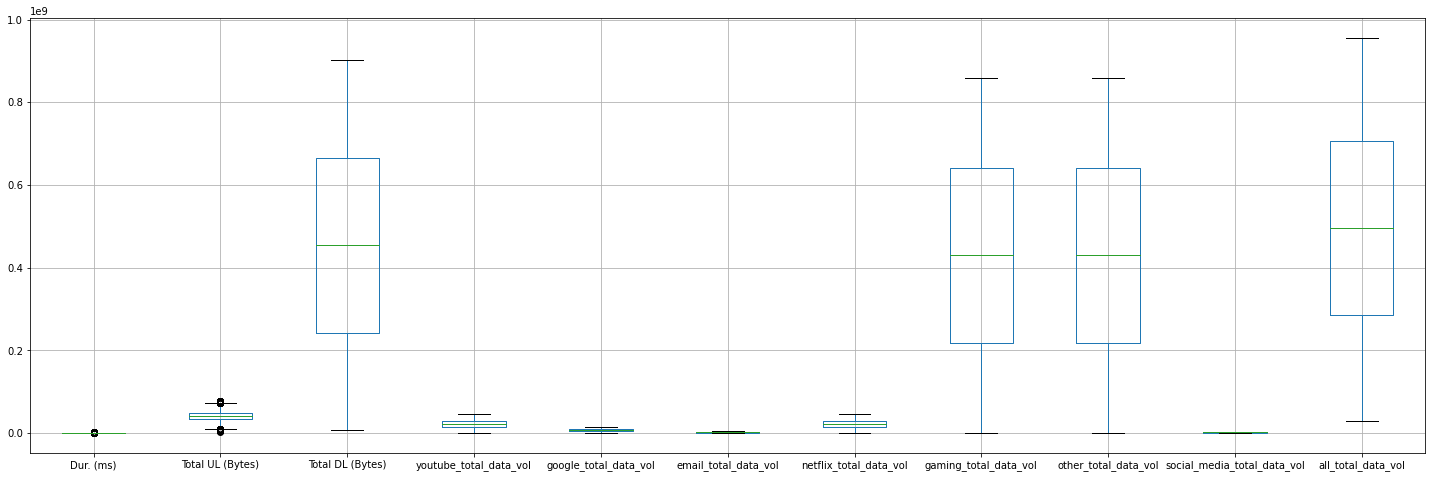

In [51]:
# boxplot to check for outlier
fig = plt.figure(figsize =(25, 8))
selected_columns.boxplot()

## Data Exploration

#### Analysis of the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective

The mean and median

#### Non-Graphical Univariate Analysis

Computing dispersion parameters for each quantitative variable. Dispersion shows how far apart the distribution are from the center and aslo each other. We would be using the Standard deviation, Variance and Skewness here.

In [53]:
selected_columns.head()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
0,1823652.0,36749741.0,308879636.0,18355943.0,2905912.0,3701304.0,17855187.0,292426453.0,180558843.0,1570185.0,345629377.0
1,1365104.0,53800391.0,653384965.0,39359124.0,4414096.0,937385.0,35565545.0,609920783.0,541959383.0,1933278.0,707185356.0
2,1361762.0,27883638.0,279807335.0,34425237.0,10229119.0,3363124.0,23751202.0,229980251.0,414908351.0,1726277.0,307690973.0
3,1321509.0,43324218.0,846028530.0,36534765.0,11811761.0,2070983.0,15092588.0,810387875.0,761837216.0,657493.0,889352748.0
4,1089009.0,38542814.0,569138589.0,34222253.0,7748843.0,2110349.0,17539799.0,531237049.0,564619822.0,912788.0,607681403.0


In [54]:
# standard variation
selected_columns.std()

Dur. (ms)                      8.103735e+04
Total UL (Bytes)               1.127635e+07
Total DL (Bytes)               2.441421e+08
youtube_total_data_vol         9.246800e+06
google_total_data_vol          3.516420e+06
email_total_data_vol           1.071109e+06
netflix_total_data_vol         9.260820e+06
gaming_total_data_vol          2.440199e+08
other_total_data_vol           2.432681e+08
social_media_total_data_vol    1.035646e+06
all_total_data_vol             2.443810e+08
dtype: float64

In [55]:
# variance
selected_columns.var()

Dur. (ms)                      6.567052e+09
Total UL (Bytes)               1.271560e+14
Total DL (Bytes)               5.960535e+16
youtube_total_data_vol         8.550332e+13
google_total_data_vol          1.236521e+13
email_total_data_vol           1.147275e+12
netflix_total_data_vol         8.576279e+13
gaming_total_data_vol          5.954572e+16
other_total_data_vol           5.917936e+16
social_media_total_data_vol    1.072563e+12
all_total_data_vol             5.972207e+16
dtype: float64

In [56]:
selected_columns.skew()

Dur. (ms)                      3.952622
Total UL (Bytes)              -0.002456
Total DL (Bytes)              -0.003153
youtube_total_data_vol        -0.005465
google_total_data_vol         -0.010602
email_total_data_vol          -0.006033
netflix_total_data_vol        -0.000409
gaming_total_data_vol         -0.003225
other_total_data_vol           0.001256
social_media_total_data_vol   -0.002121
all_total_data_vol            -0.002457
dtype: float64

The skewness values can be interpreted in the following manner:
Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
Approximately symmetric distribution: If the skewness value is between −½ and +½.

#### Graphical Univariate Analysis

Here, the most suitable plotting options for each variable is being identified and plotted

In [57]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Duration Histogram')

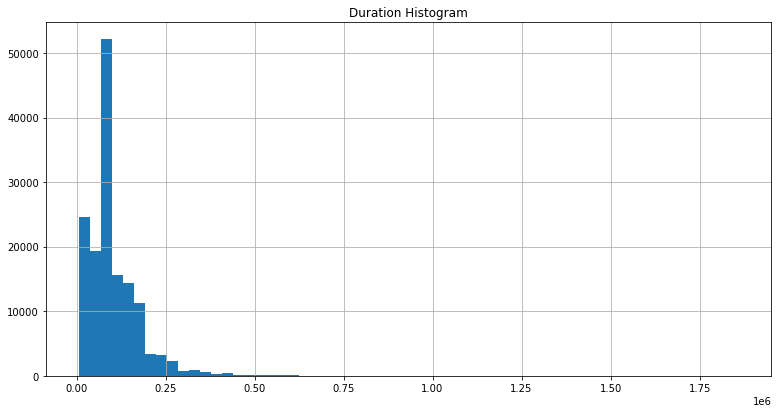

In [62]:
plt.figure(figsize=(13, 6.5))
selected_columns['Dur. (ms)'].hist(bins=60)
plt.title('Duration Histogram')

a clear presence of outlier shown

Text(0.5, 1.0, 'Total data upload Histogram')

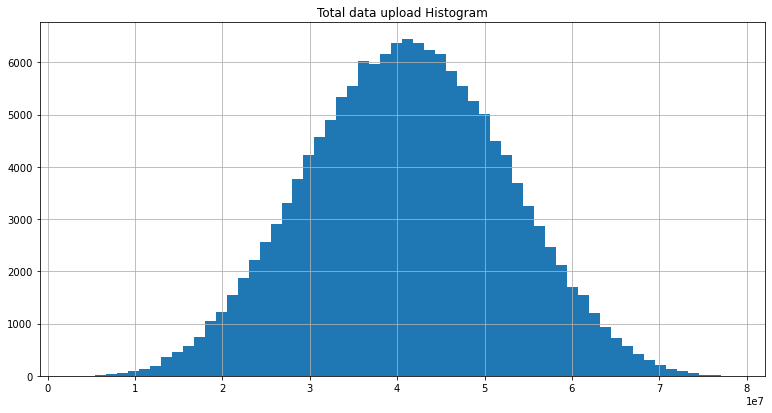

In [64]:
plt.figure(figsize=(13, 6.5))
selected_columns['Total UL (Bytes)'].hist(bins=60)
plt.title('Total data upload Histogram')

it is has a normal/gaussian distribution

Text(0.5, 1.0, 'Total data download Histogram')

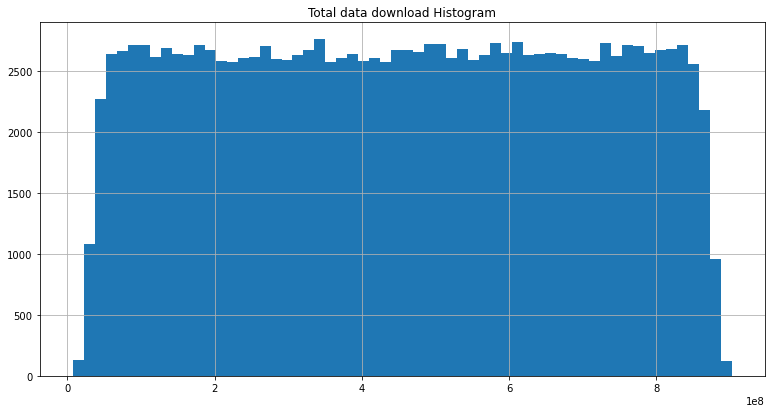

In [65]:
plt.figure(figsize=(13, 6.5))
selected_columns['Total DL (Bytes)'].hist(bins=60)
plt.title('Total data download Histogram')

Text(0.5, 1.0, 'Top most used applications')

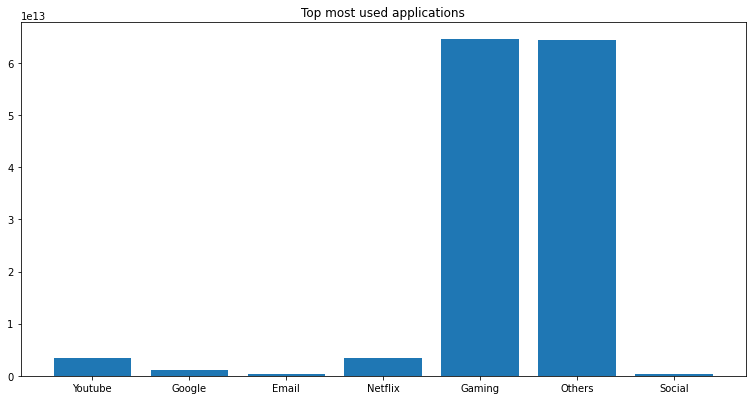

In [67]:
app_usage = selected_columns[["youtube_total_data_vol", "google_total_data_vol", "email_total_data_vol",
                              "netflix_total_data_vol", "gaming_total_data_vol", "other_total_data_vol",
                              "social_media_total_data_vol"]]
ind = np.arange(7)
width =0.8

plt.figure(figsize=(13, 6.5))
plt.xticks(ind , ("Youtube", "Google", "Email", "Netflix", "Gaming", "Others", "Social"))
plt.bar(ind, app_usage.sum(), width)
plt.title("Top most used applications")